# Question 5: The gravity anomaly from a buried sphere

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

In [106]:
import pandas as pd

In [47]:
data = pd.read_table("hw_comma.txt", sep=",")
data.head()

,distance,gravity
0,1,10.3614
1,2,10.5785
2,3,10.7981
3,4,11.0207
4,5,11.2467


## Removing the regional anomaly from the gravity data

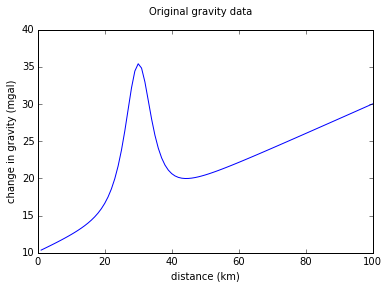

In [129]:
data
plt.plot(data['distance'], data['gravity'])
plt.xlabel('distance (km)')
plt.ylabel('change in gravity (mgal)')
plt.suptitle('Original gravity data')

This graph shows two separate gravity anomalies -- the regional anomaly and a local anomaly. The linear regional anomaly has a slope of 0.19829 and an intercept of 10.163. This is found using points at each extreme of the range and calculating the slope and intercept.

In [58]:
#calculate the linear regional anomaly.
data['calc'] = data['distance']*0.19829 + 10.163
data.head()

,distance,gravity,calc
0,1,10.3614,10.36129
1,2,10.5785,10.55958
2,3,10.7981,10.75787
3,4,11.0207,10.95616
4,5,11.2467,11.15445


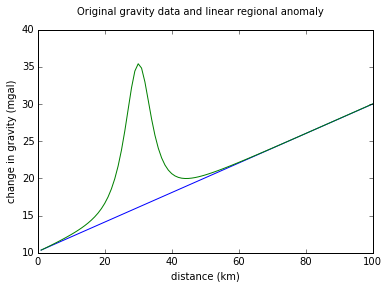

In [128]:
#plot the linear regional anomaly.
plt.plot(data['distance'], data['calc'])
plt.plot(data['distance'], data['gravity'])
plt.xlabel('distance (km)')
plt.ylabel('change in gravity (mgal)')
plt.suptitle('Original gravity data and linear regional anomaly')

In [118]:
#subtract the calculated regional anomaly to find the local gravity anomaly.
data['residual'] = data['gravity']-data['calc']
data.head()

,distance,gravity,calc,residual
0,1,10.3614,10.36129,0.00011
1,2,10.5785,10.55958,0.01892
2,3,10.7981,10.75787,0.04023
3,4,11.0207,10.95616,0.06454
4,5,11.2467,11.15445,0.09225


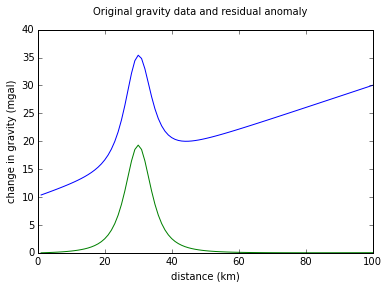

In [127]:
data
plt.plot(data['distance'], data['gravity'])
plt.plot(data['distance'], data['residual'])
plt.xlabel('distance (km)')
plt.ylabel('change in gravity (mgal)')
plt.suptitle('Original gravity data and residual anomaly')

Subtracting the calculated regional anomaly from the given gravity data leaves the residual anomaly (shown above in green).

## Modeling the residual anomaly

The depth of the anomaly can be found from the width at half height. The maximum height of the residual anomaly is 19.29640 and is found at position x = 30 km. 

In [104]:
#Calculate the half max.
data['residual'].max()/2

9.6482

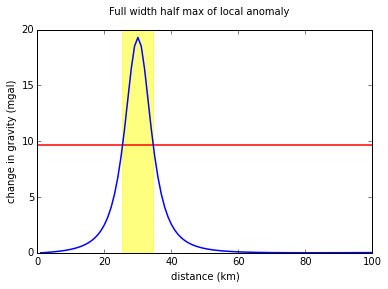

In [150]:
plt.plot((0, 100), (9.6482, 9.6482), 'r-', linewidth=1.5)
plt.plot(data['distance'], data['residual'], linewidth=1.5)
plt.axvspan(25.2, 34.5, alpha=0.5, color='yellow')
plt.xlabel('distance (km)')
plt.ylabel('change in gravity (mgal)')
plt.suptitle('Full width half max of local anomaly')

This plot shows the half maximum (plotted as the red horizonal line) and the full width at half maximum (the yellow fill).

In [117]:
#Calculate the width at half max.
w = (34.5-25.2)
print("The full width at half max is {} km.".format(w))

#Find z, the depth of the buried sphere, in kilometers.
z = 0.652*w
print("The depth of the buried sphere is {} km.".format(z))

The full width at half max is 9.3 km.
The depth of the buried sphere is 6.0636 km.


Now there are two unknowns, the density contrast and the radius of the buried sphere, and one equation. As a result, it is not possible to solve for both of those. As the textbook says, there can be many different combinations of change in density and radius.

$$\Delta g_0 = G \frac{4 \pi \Delta R^3}{3 z^2}$$

To estimate, I assumed that the crust in this location was of average density. The average density of earth's crust is 2.2 g/cm^3 and the average density of iron ore is 2.5 g/cm^3. So an estimate of the change in density is 0.3 g/cm^3. Using this estimated average density, it is possible to calculate the corresponding radius of the buried sphere.

$$R^3 = \frac{3 \Delta g_0 z^2}{4 G \pi \Delta\rho}$$




If the density contrast is 0.3 g/cm^3, the radius of the buried sphere can be found to be 9450 m. For any other possible value of the density contrast, the radius can similarly be calculated.